In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

### Q1

In [4]:
data = pd.read_csv("/content/drive/MyDrive/tobigs22/정규세션/1주차/기초통계1/bacteria.csv")

In [5]:
data.head()

,t,nt
0,1,355
1,2,211
2,3,197
3,4,166
4,5,142


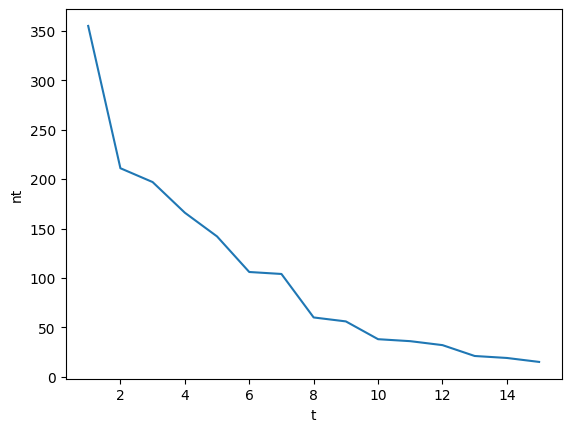

In [6]:
# 데이터 추세 파악
plt.plot(data['t'], data['nt'])
plt.xlabel('t')
plt.ylabel('nt')
plt.show()

In [7]:
model = LinearRegression()
model.fit(data[['t']], data['nt'])

# 예측값과 표준화 잔차 계산
fitted_values = model.predict(data[['t']])
standardized_residuals = (data['nt'] - fitted_values) / data['nt'].std()

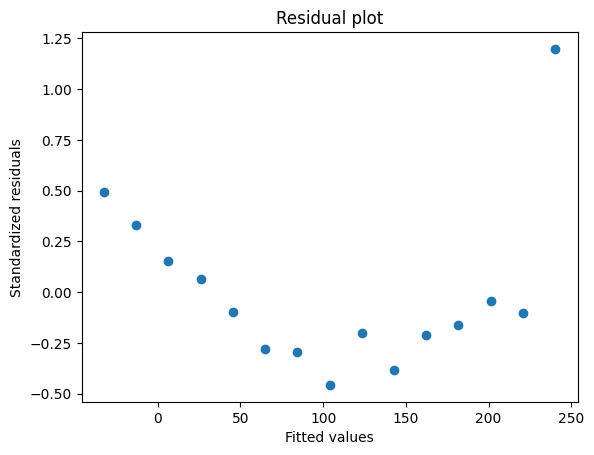

In [8]:
# residual plot
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.title('Residual plot')
plt.show()

bacteria 데이터에 단순 회귀 모형을 적용하였더니 등분산성을 위배하는 잔차 양상이 관찰되었습니다.
이를 개선하기 위해 데이터 변환 기법, 가중 최소제곱법 등 적절한 통계적 기법을 동원하여 등분산성이 관측되도록 해주세요. (아래에 코드 작성해주세요)

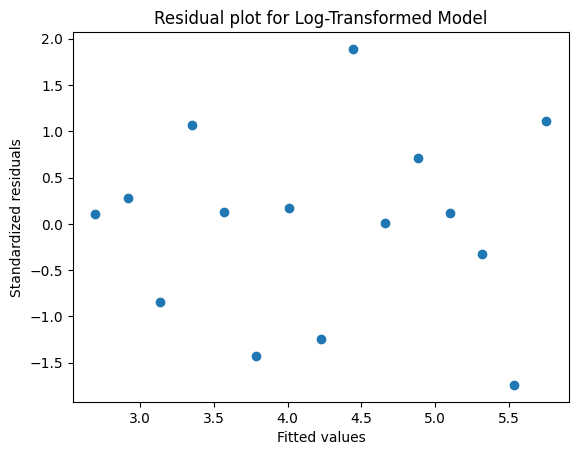

In [9]:
# ans : 데이터에 log scaling을 진행한다.
data['log_nt'] = np.log(data['nt'])

# 로그 변환된 데이터에 대한 선형 회귀 모델 적합
model_log = LinearRegression()
model_log.fit(data[['t']], data['log_nt'])

# 예측값과 표준화 잔차 계산
fitted_values_log = model_log.predict(data[['t']])
residuals_log = data['log_nt'] - fitted_values_log
standardized_residuals_log = residuals_log / residuals_log.std()

# residual plot for log-transformed model
plt.scatter(fitted_values_log, standardized_residuals_log)
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.title('Residual plot for Log-Transformed Model')
plt.show()

### Q2

In [14]:
# 데이터 로드
data2 = pd.read_csv("/content/drive/MyDrive/tobigs22/정규세션/1주차/기초통계1/artificial1.csv")

In [15]:
data2.head()

,X,Y
0,11.0142,24.8831
1,2.7066,14.7374
2,11.5839,64.0250
3,8.9989,16.1965
4,2.1201,7.3907


In [16]:
# 선형 회귀 모형 적합
result1 = smf.ols('Y ~ X', data=data2).fit()

# 잔차 표준화 및 산점도 그리기
fitted_values = result1.predict()
standardized_residuals = result1.get_influence().resid_studentized_internal

In [17]:
# 요약 정보 출력
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     34.69
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           5.44e-08
Time:                        16:51:38   Log-Likelihood:                -352.93
No. Observations:                 100   AIC:                             709.9
Df Residuals:                      98   BIC:                             715.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0482      2.324      2.602      0.0

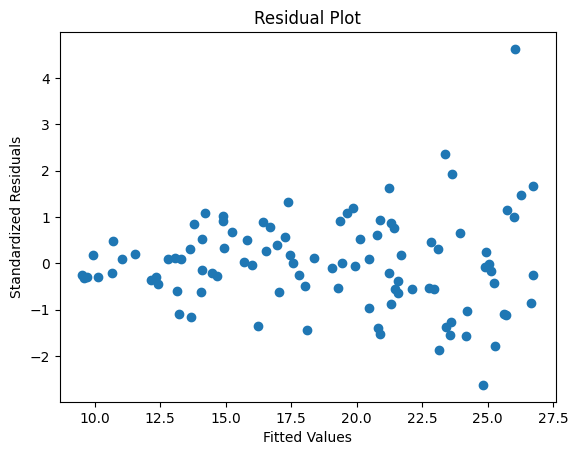

In [18]:
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Residual Plot')
plt.show()

artificial1데이터에 단순 회귀 모형을 피팅하였더니 등분산성을 위배하는 잔차 양상이 관찰되었습니다.
이를 개선하기 위해 데이터 변환 기법, 가중 최소제곱법 등 적절한 통계적 기법을 동원하여 등분산성이 관측되도록 해주세요. (아래에 코드 작성해주세요)

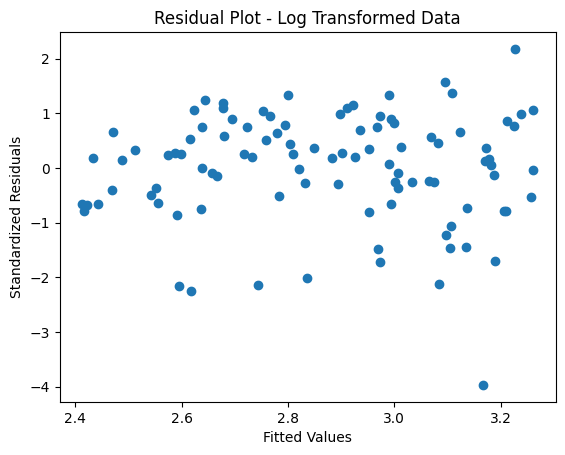

In [22]:
# ans : 로그 변환을 수행한다

import statsmodels.api as sm
# 로그 변환 적용
data2['log_Y'] = np.log(data2['Y'] + 1)  # Y값에 0이 있을 수 있으므로 1을 더함

# 로그 변환된 데이터에 대한 선형 회귀 모델 적합
model_log = sm.OLS(data2['log_Y'], sm.add_constant(data2['X'])).fit()

# 잔차 플롯 그리기
fitted_values_log = model_log.predict()
residuals_log = data2['log_Y'] - fitted_values_log
standardized_residuals_log = residuals_log / residuals_log.std()

plt.scatter(fitted_values_log, standardized_residuals_log)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Residual Plot - Log Transformed Data')
plt.show()

### Q3. 단순회귀모델에서 등분산성이 위배되는 것이 문제가 되는 이유가 무엇인지에 대해서 강의 내용을 바탕으로 서술하여주세요.

ans : 등분산성에 위배되면 최소제곱법으로 모델링한 단순회귀모델의 회귀계수들이 최소분산을 갖지 않게 되어, 오차의 분산이 크다는 것이고, 이는 좋은 모델이 될 수 없음.